In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from tabulate import tabulate

warnings.filterwarnings("ignore")

In [56]:



# Lire le fichier Excel
df = pd.read_excel("Tableau_monnaies_pour_la_statistique.xlsx", sheet_name=0)

# Afficher les premières lignes
print("LISTE DES COLONNES")
for col in df.columns:
    print(col)

LISTE DES COLONNES
Empereur
Dynastie
Épithète
Lieu de production
Valeur
Datation
N° inventaire
Objets
Trésors
Attributs Revers
Avers
Autorité émettrice


In [57]:
# Listes indépendantes sans doublons
empereurs = df["Empereur"].drop_duplicates().sort_values().reset_index(drop=True).fillna("-")
dynasties = df["Dynastie"].drop_duplicates().sort_values().reset_index(drop=True).fillna("-")

# Créer un tableau avec les deux listes indépendantes
tableau = pd.DataFrame({
    "empereur": empereurs,
    "dynastie": dynasties
}).fillna("-")

# print(tableau.to_string(index=False))
print(tabulate(tableau, headers="keys", tablefmt="pretty", showindex=False))

+------------------+----------------+
|     empereur     |    dynastie    |
+------------------+----------------+
|     Anonyme      |    Antonin     |
| Antonin le Pieux |    Flavien     |
|     Auguste      | Julio-Claudien |
|    Caracalla     |     Sévère     |
|     Commode      |       -        |
|     Domitien     |       -        |
|       Geta       |       -        |
|     Hadrien      |       -        |
|  Septime Sévère  |       -        |
|      Trajan      |       -        |
+------------------+----------------+


<Figure size 1200x600 with 0 Axes>

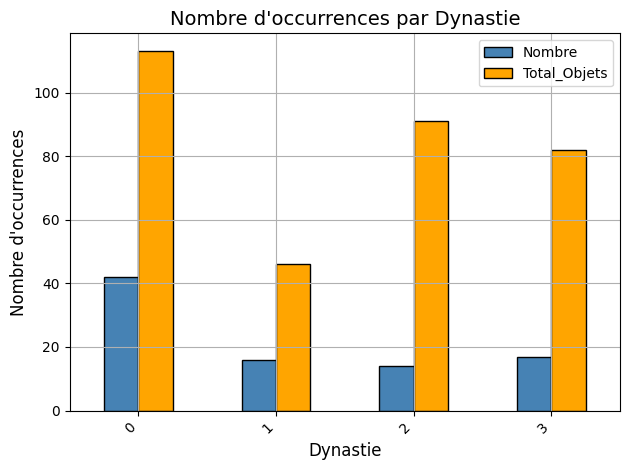

In [58]:
# Clé
key = "Dynastie"

# Compter les occurrences
# occurrences = df[key].value_counts()
occurrences = df.groupby(key).agg(
    Nombre=(key, "size"),
    Total_Objets=("Objets", "sum")
).reset_index()

# Créer le graphique
plt.figure(figsize=(12, 6))
occurrences.plot(kind="bar", color=["steelblue", "orange"], edgecolor="black")

plt.title(f"Nombre d'occurrences par {key}", fontsize=14)
plt.xlabel(key, fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid()
plt.tight_layout()

plt.show()

In [59]:
occurrences

,Dynastie,Nombre,Total_Objets
0,Antonin,42,113.0
1,Flavien,16,46.0
2,Julio-Claudien,14,91.0
3,Sévère,17,82.0


# Nombre de pièces par valeur pour chaque empereur

In [60]:
# resultat = df.groupby(["Empereur", "Valeur"]).size().reset_index(name="Nombre")

resultat = df.groupby(["Empereur", "Valeur"]).agg(
    Nombre=("Valeur", "size"),
    Total_Objets=("Objets", "sum")
).reset_index()

print(resultat.to_string(index=False))

        Empereur    Valeur  Nombre  Total_Objets
         Anonyme  Quadrans       1           1.0
Antonin le Pieux        As       3           8.0
Antonin le Pieux    Aureus      10           9.0
Antonin le Pieux    Denier       3          24.0
Antonin le Pieux Dupondius       1           1.0
Antonin le Pieux  Sesterce       2          13.0
         Auguste    Aureus       6          23.0
         Auguste    Denier       8          68.0
       Caracalla        As       1           0.0
       Caracalla    Denier       3          41.0
       Caracalla  Sesterce       4           4.0
         Commode        As       3           6.0
         Commode    Aureus       1           1.0
         Commode    Denier       4          33.0
         Commode  Sesterce       6          14.0
        Domitien  Quadrans       2           4.0
        Domitien     Semis      14          42.0
            Geta  Sesterce       3           3.0
  Septime Sévère        As       2          12.0
  Septime Sévère    

In [61]:
# Liste des empereurs à afficher
empereurs_filtres = ['Auguste', 'Dominitien', 'Antonin le Pieux', 'Commode']


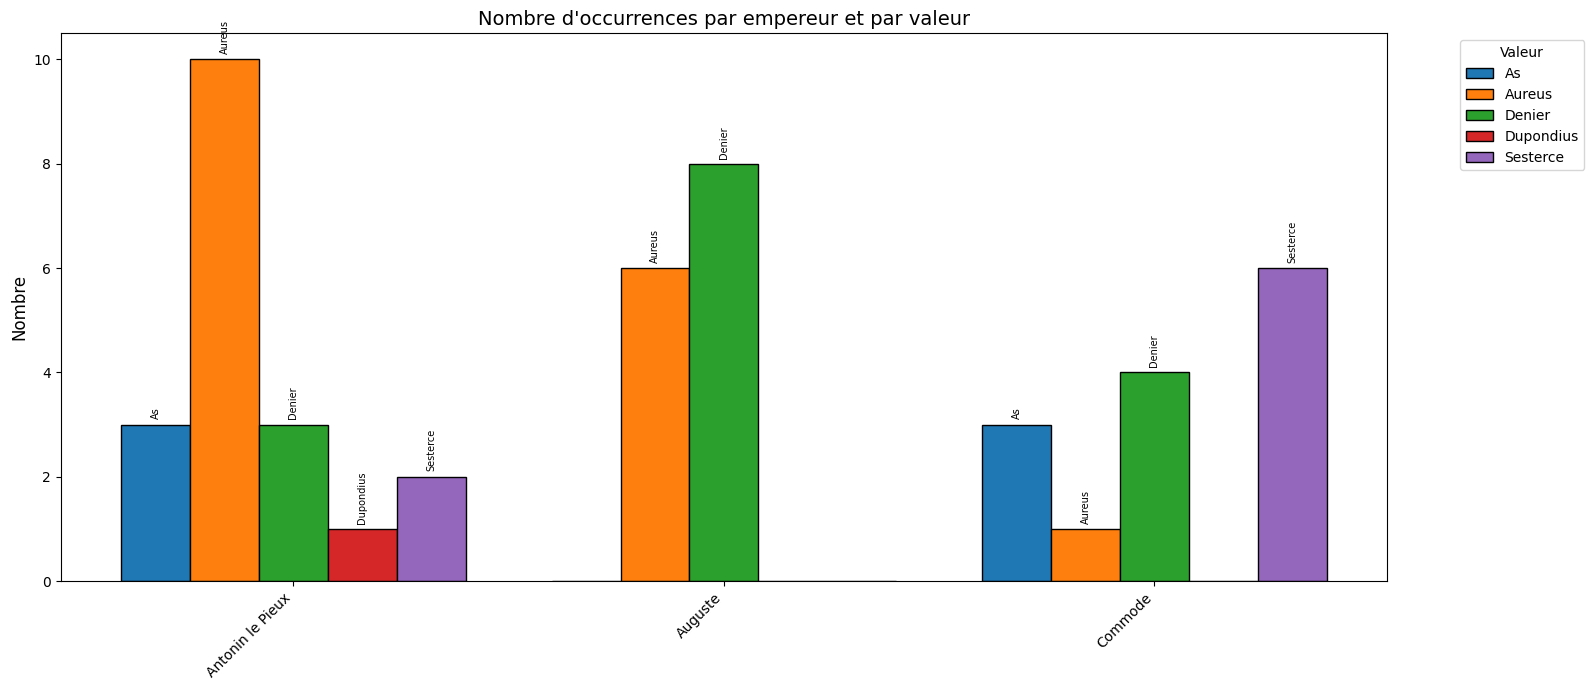

In [62]:
# Filtrer le dataframe
df2 = df[df["Empereur"].isin(empereurs_filtres)]
# Compter les occurrences par empereur et valeur
resultat = df2.groupby(["Empereur", "Valeur"]).size().reset_index(name="Nombre")

empereurs = resultat["Empereur"].unique()
valeurs = resultat["Valeur"].unique()

fig, ax = plt.subplots(figsize=(16, 7))

# Largeur et positions des barres
bar_width = 0.8 / len(valeurs)
x = np.arange(len(empereurs))

for i, valeur in enumerate(valeurs):
    data = [resultat[(resultat["Empereur"] == emp) & (resultat["Valeur"] == valeur)]["Nombre"].sum() for emp in empereurs]
    bars = ax.bar(x + i * bar_width, data, width=bar_width, label=valeur, edgecolor="black")
    # Afficher le nom de la valeur sur chaque barre
    for bar, val in zip(bars, data):
        if val > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
                    valeur, ha="center", va="bottom", fontsize=7, rotation=90)

# Noms des empereurs au centre de chaque groupe
ax.set_xticks(x + bar_width * (len(valeurs) - 1) / 2)
ax.set_xticklabels(empereurs, rotation=45, ha="right", fontsize=10)

ax.set_title("Nombre d'occurrences par empereur et par valeur", fontsize=14)
ax.set_ylabel("Nombre", fontsize=12)
ax.legend(title="Valeur", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()

## Les attributs d'Appolon

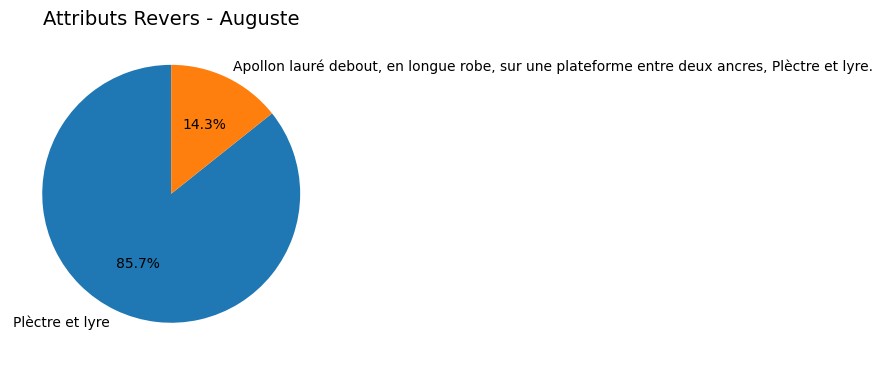

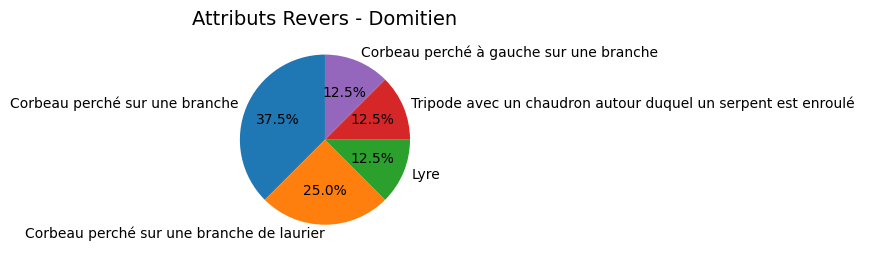

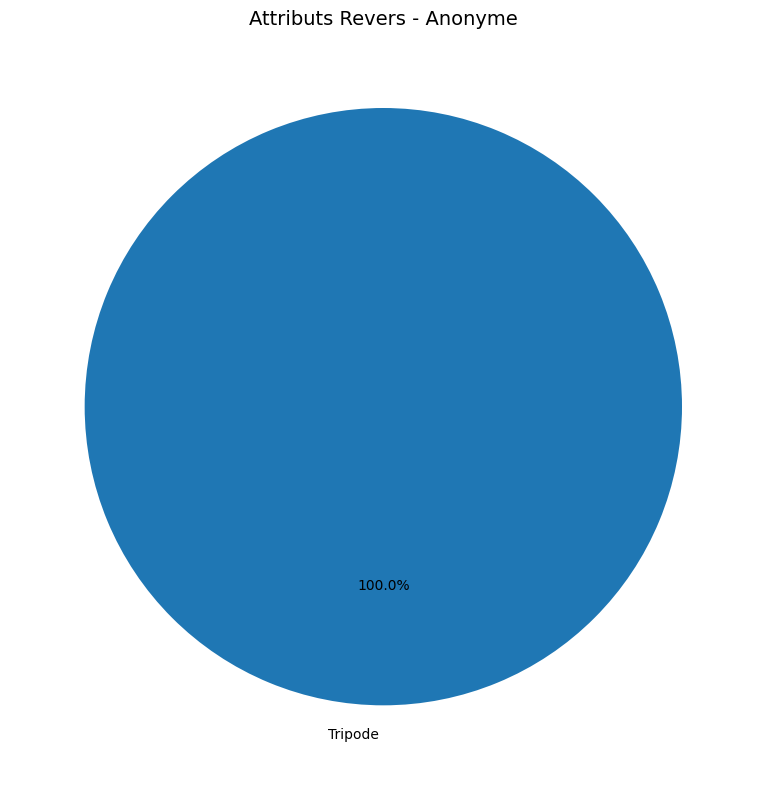

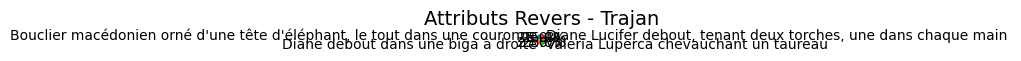

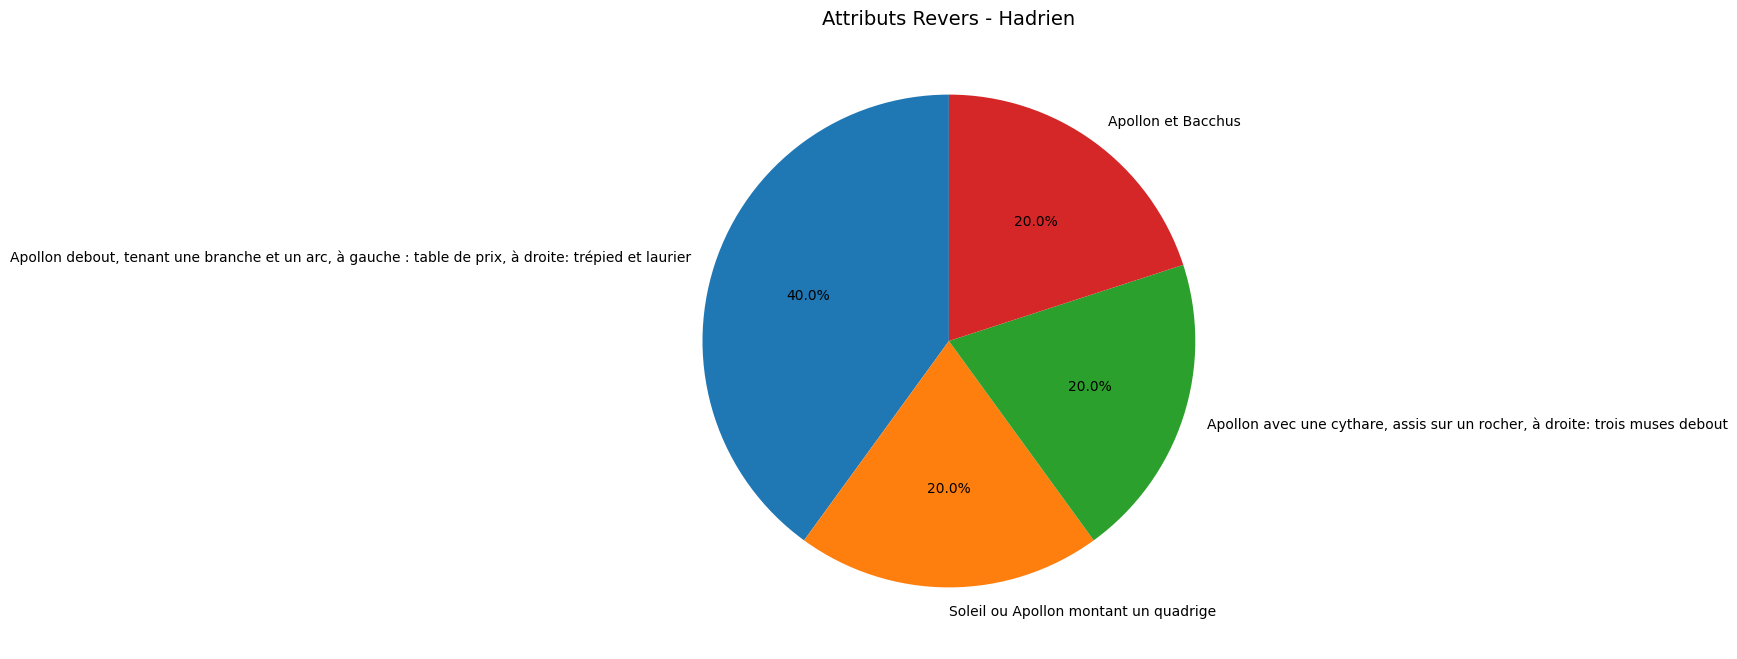

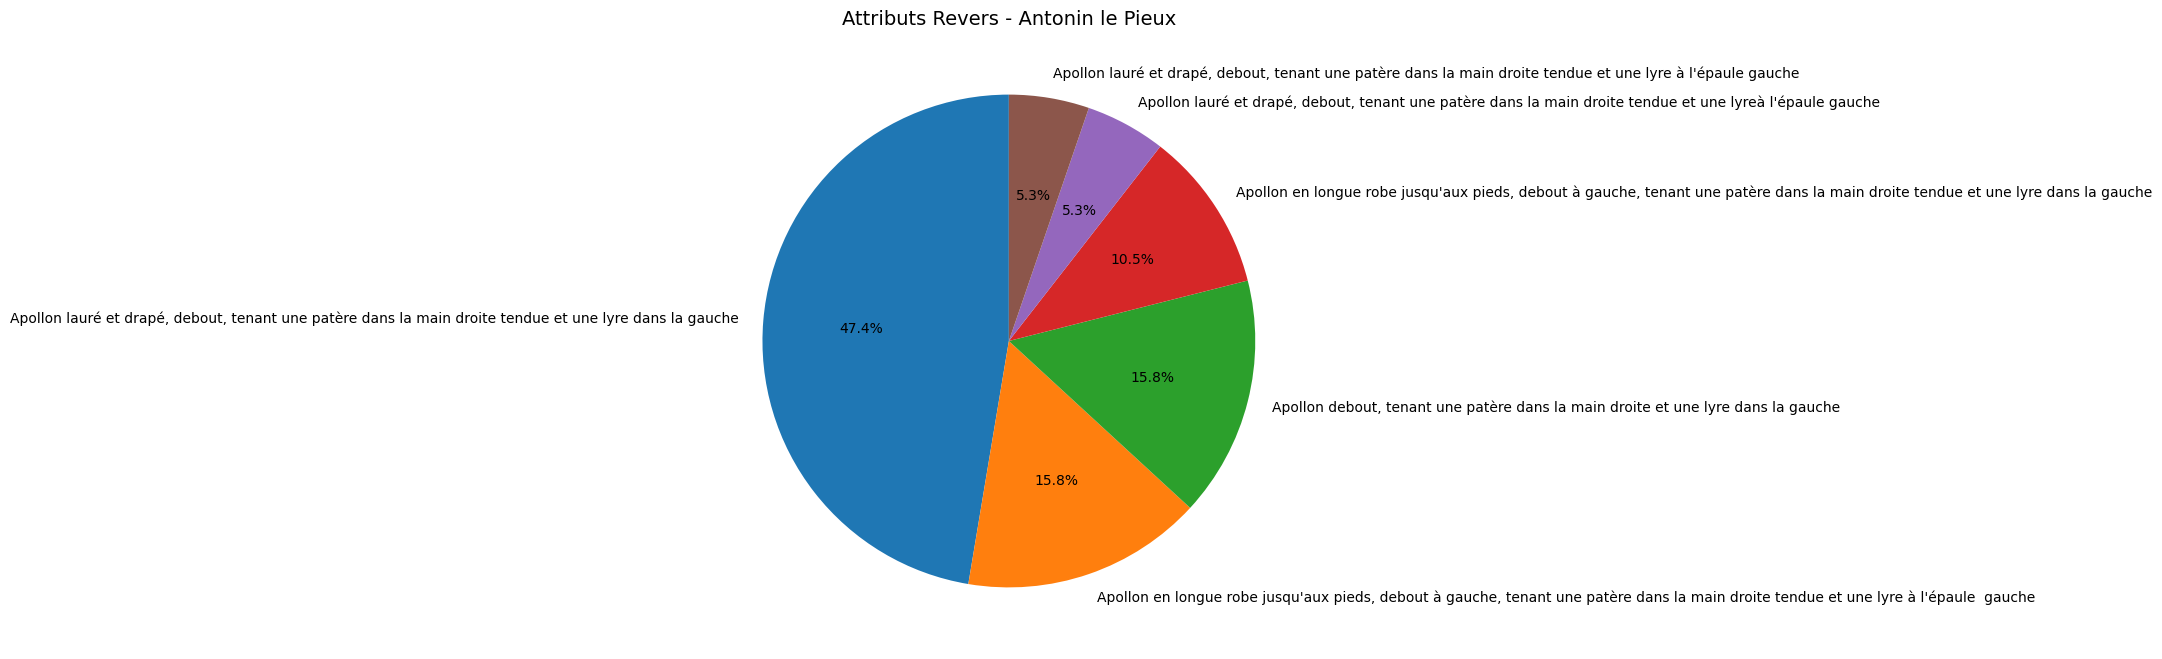

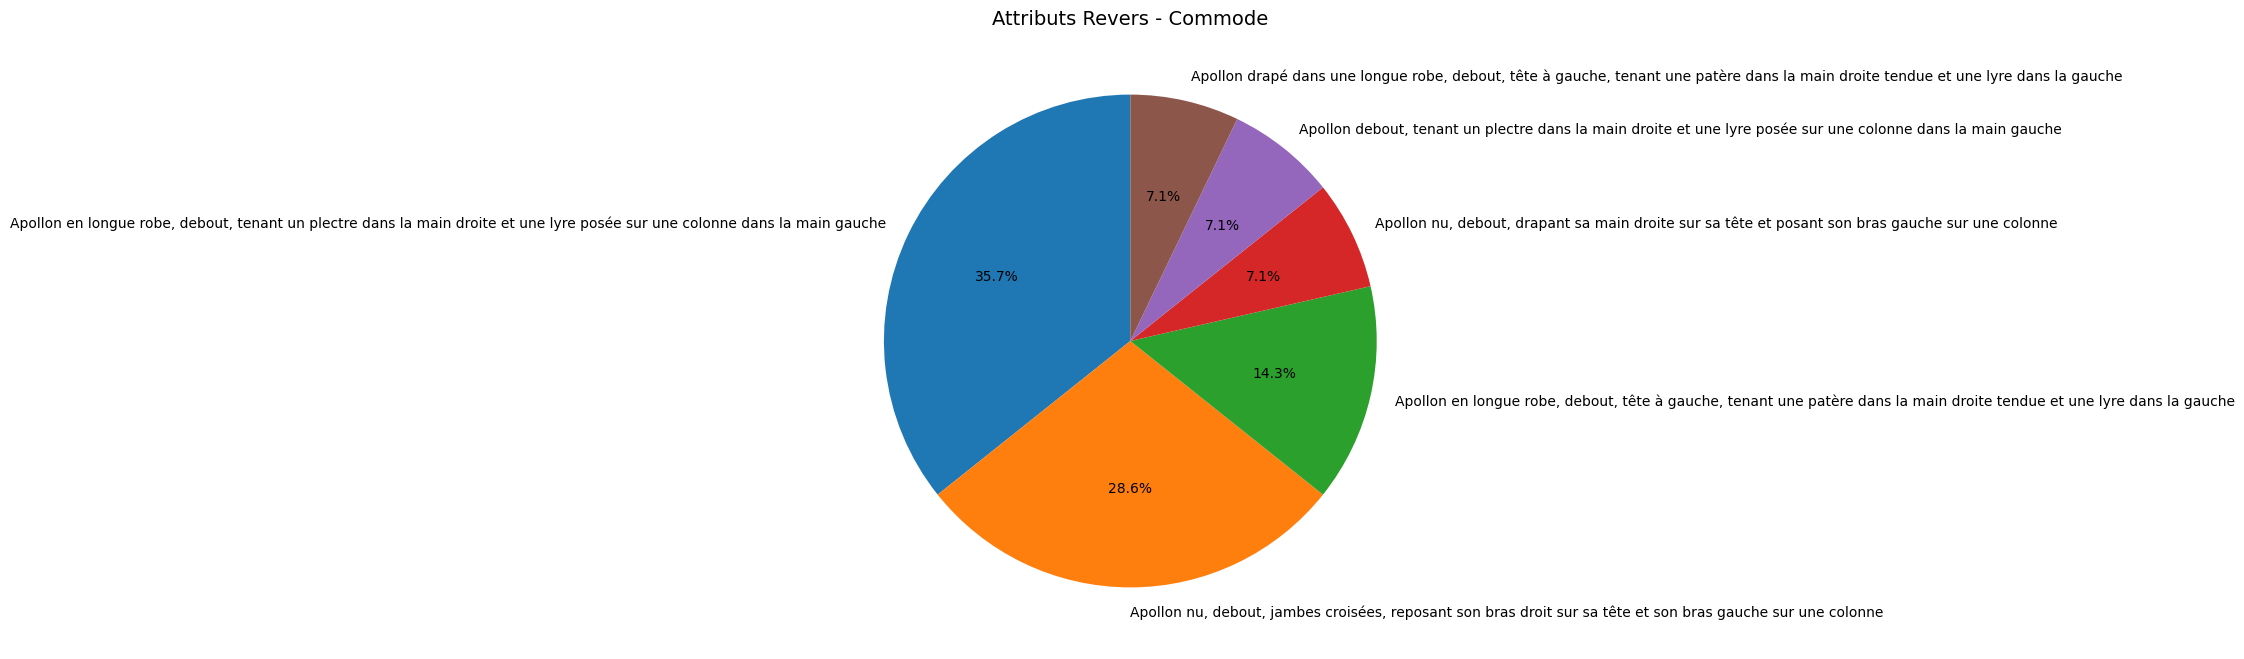

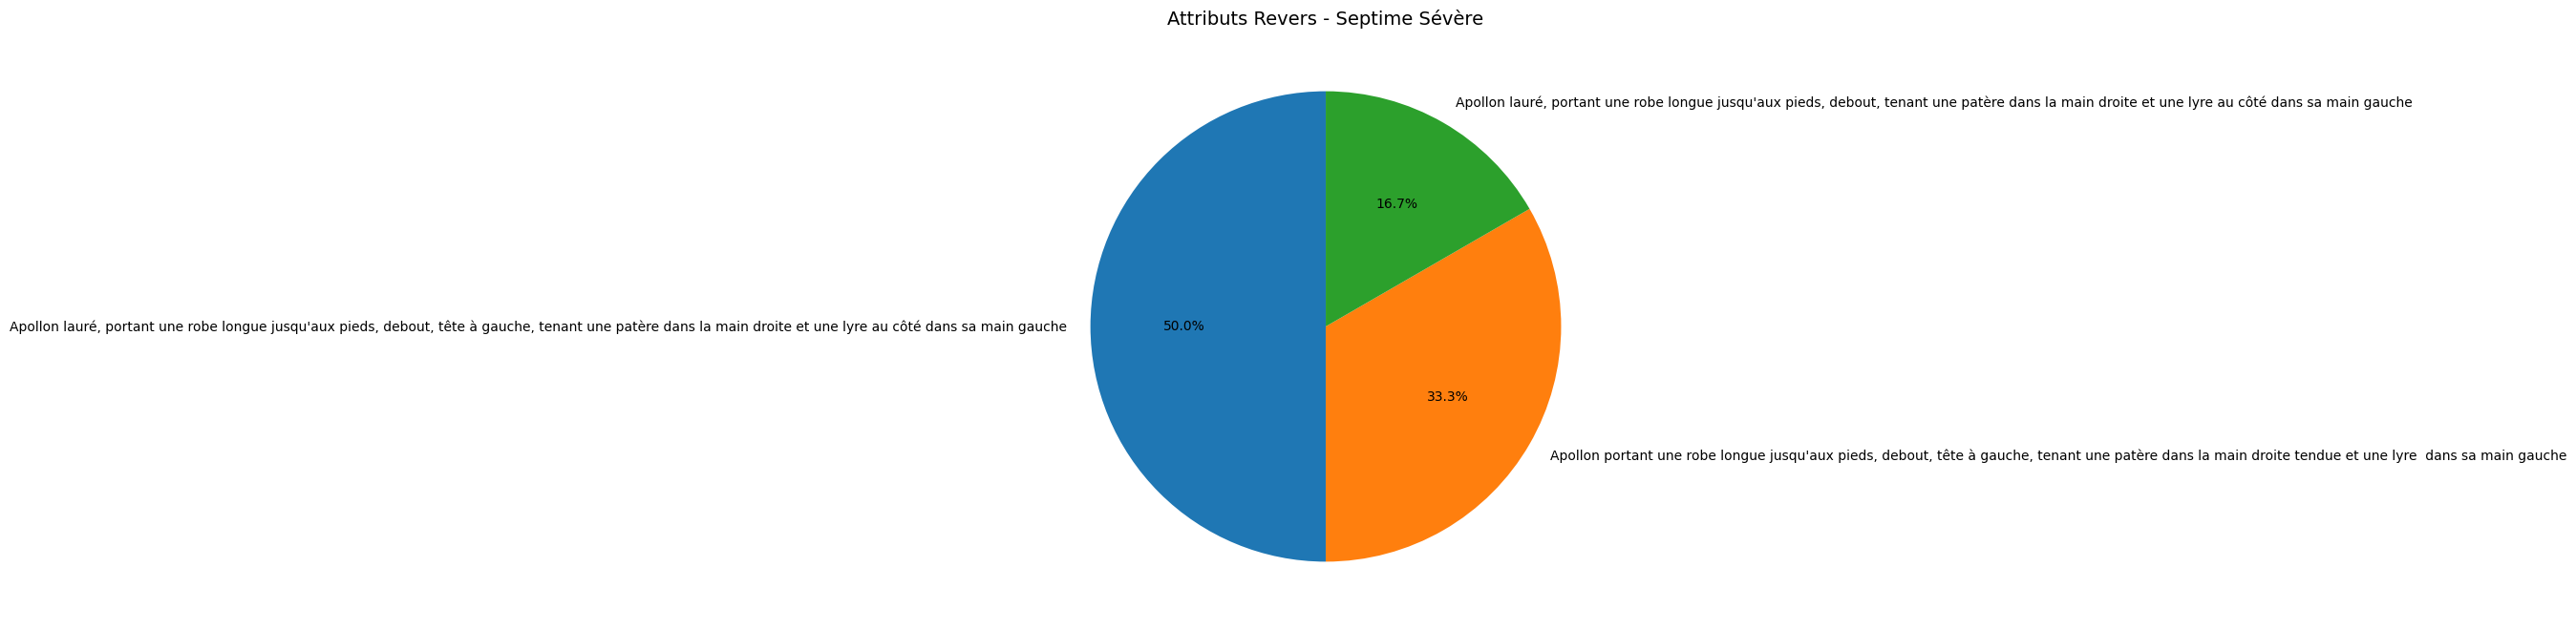

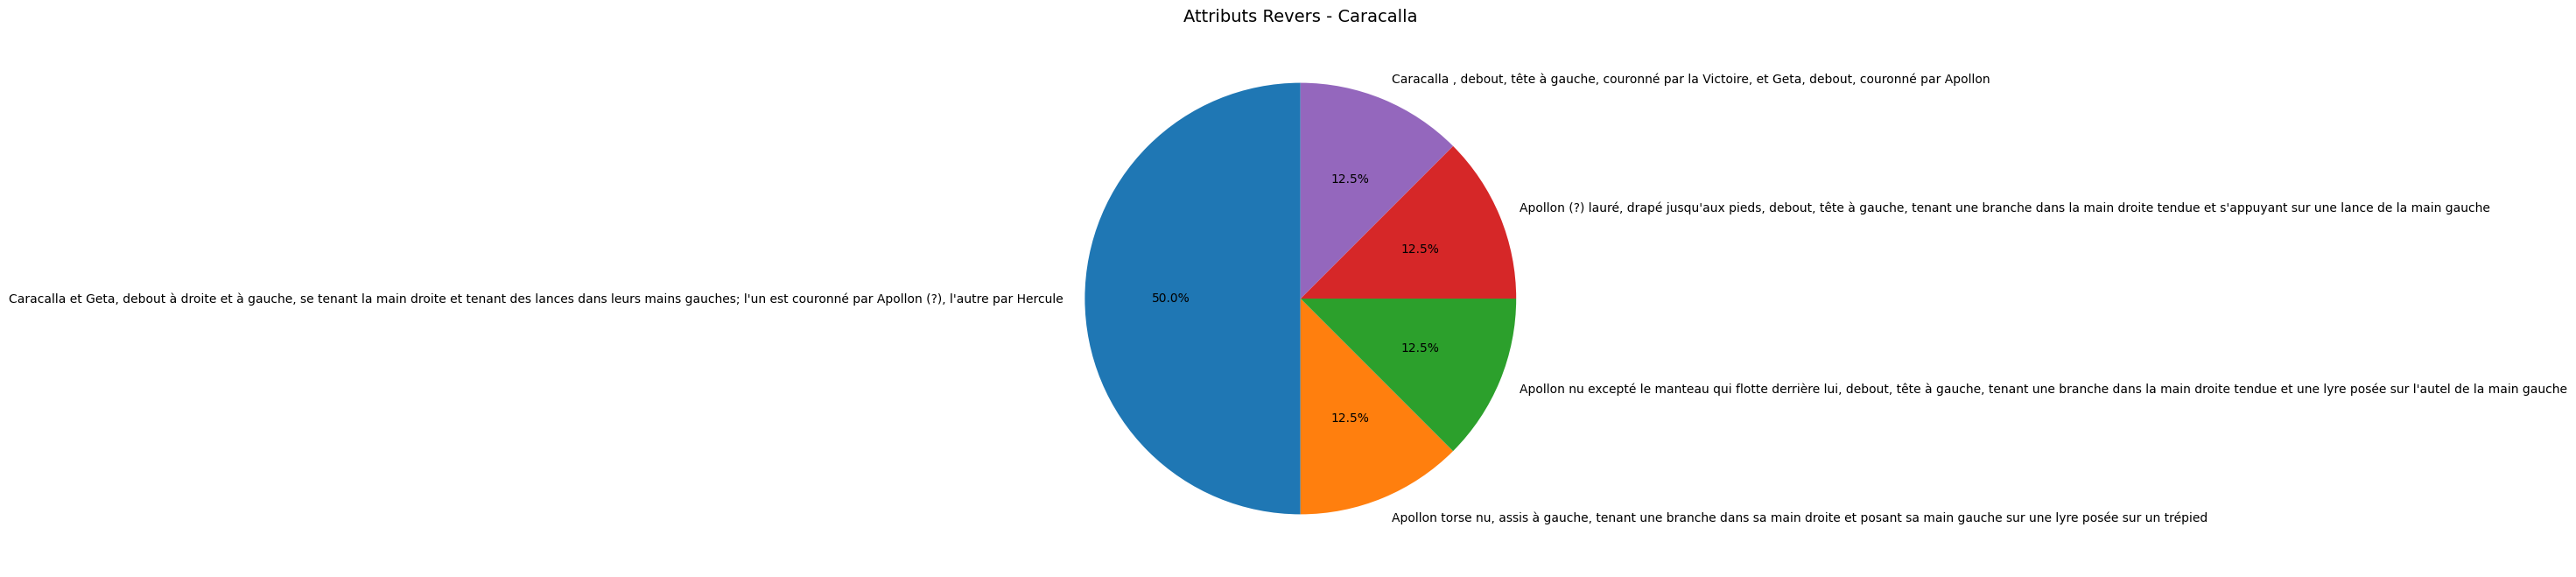

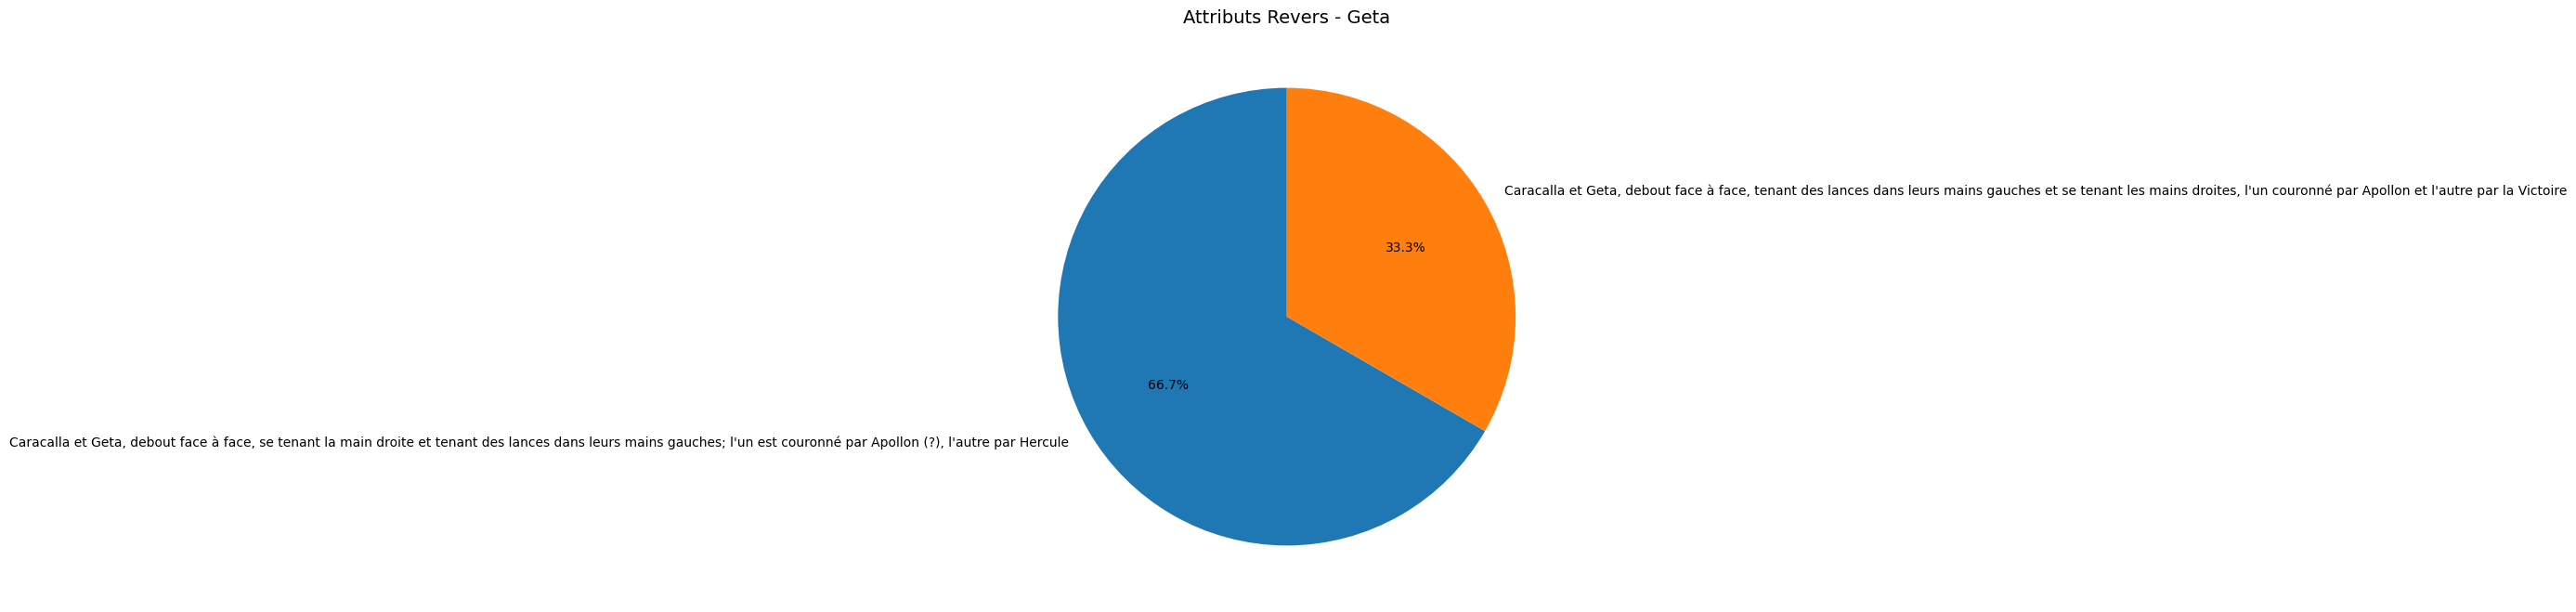

In [63]:
# Liste des empereurs
empereurs = df["Empereur"].dropna().unique()

for empereur in empereurs:
    df_emp = df[df["Empereur"] == empereur]
    
    # Compter les occurrences des attributs revers
    attributs = df_emp["Attributs Revers"].value_counts()
    
    if attributs.empty:
        continue
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(attributs.values, labels=attributs.index, autopct="%1.1f%%", startangle=90)
    ax.set_title(f"Attributs Revers - {empereur}", fontsize=14)
    plt.tight_layout()
    plt.show()

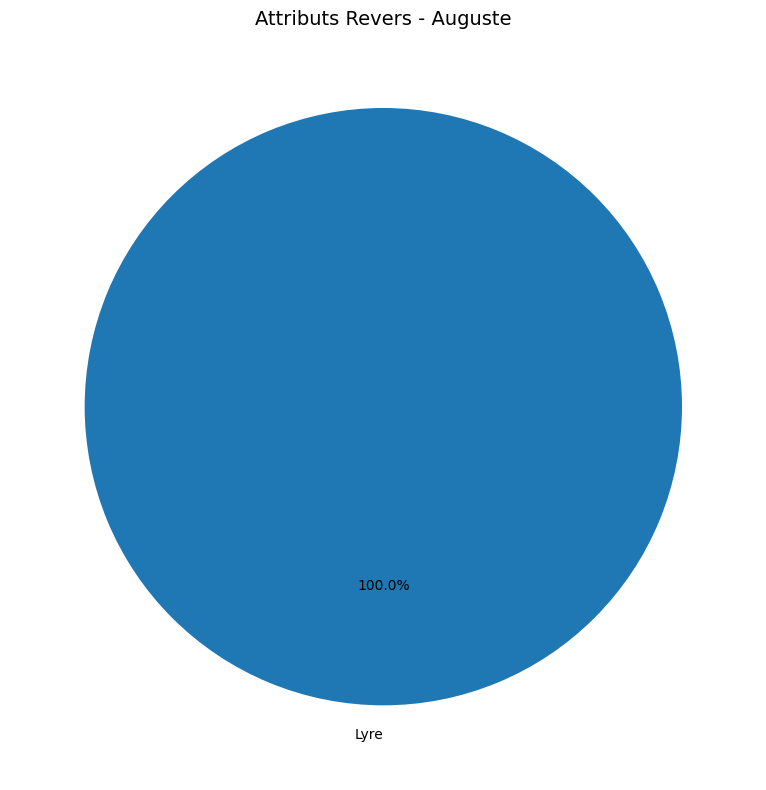

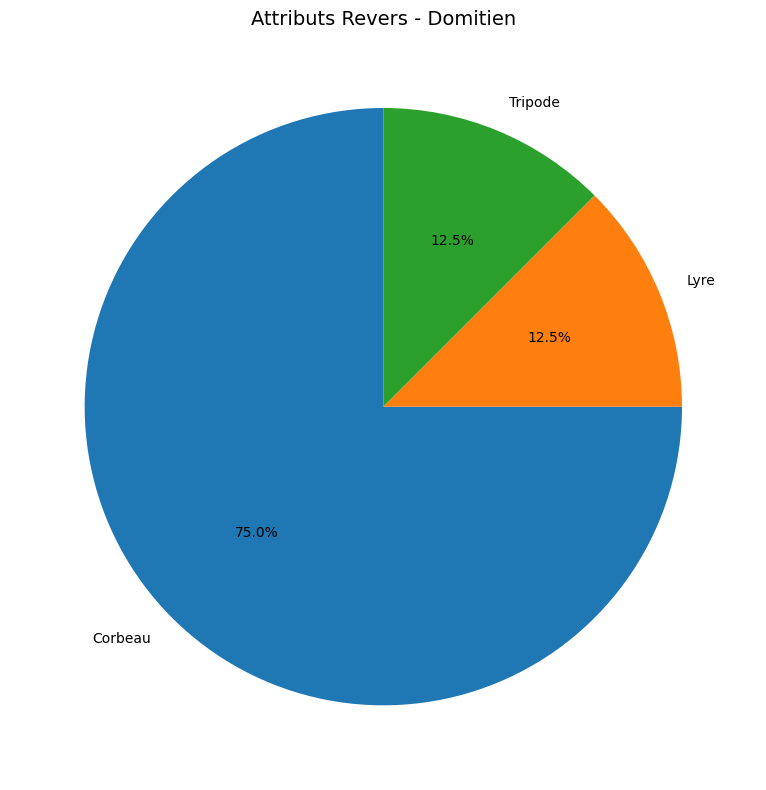

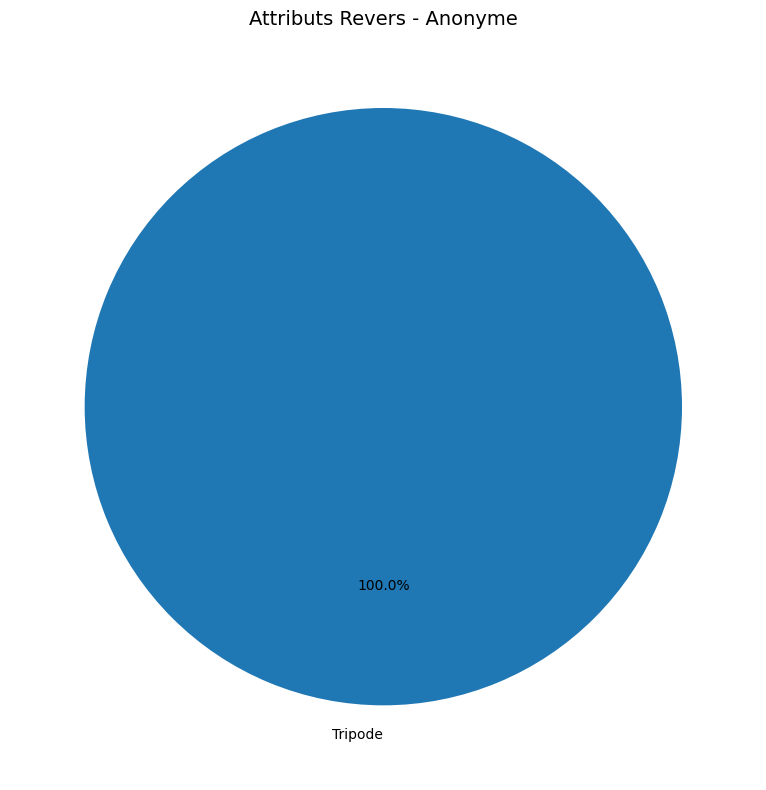

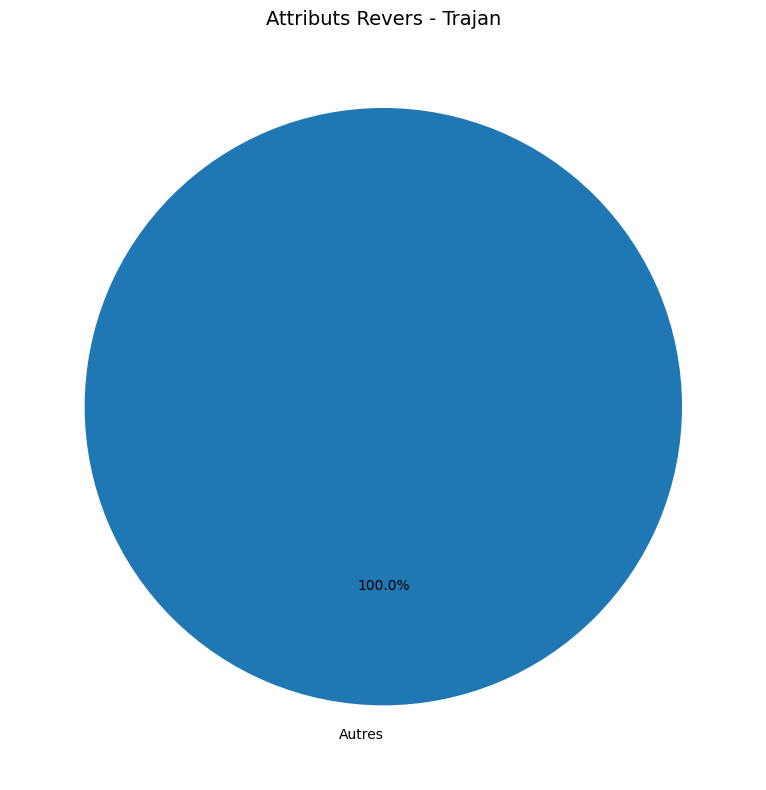

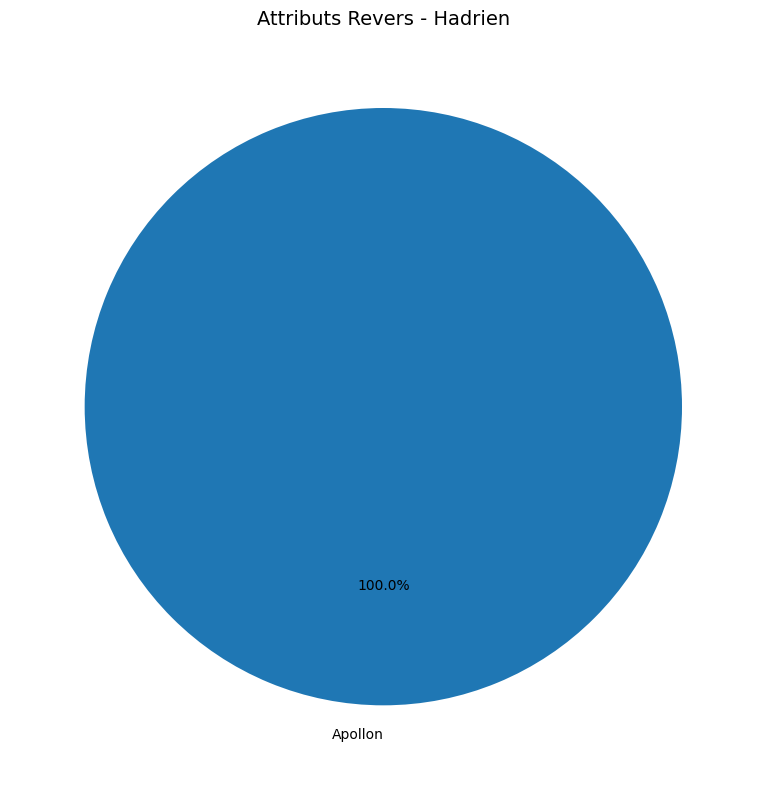

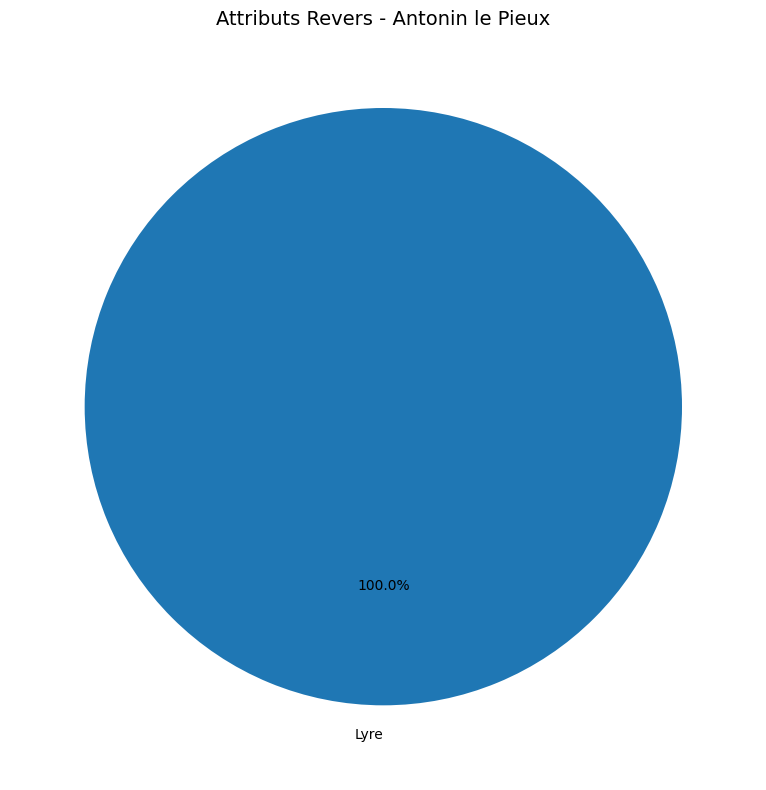

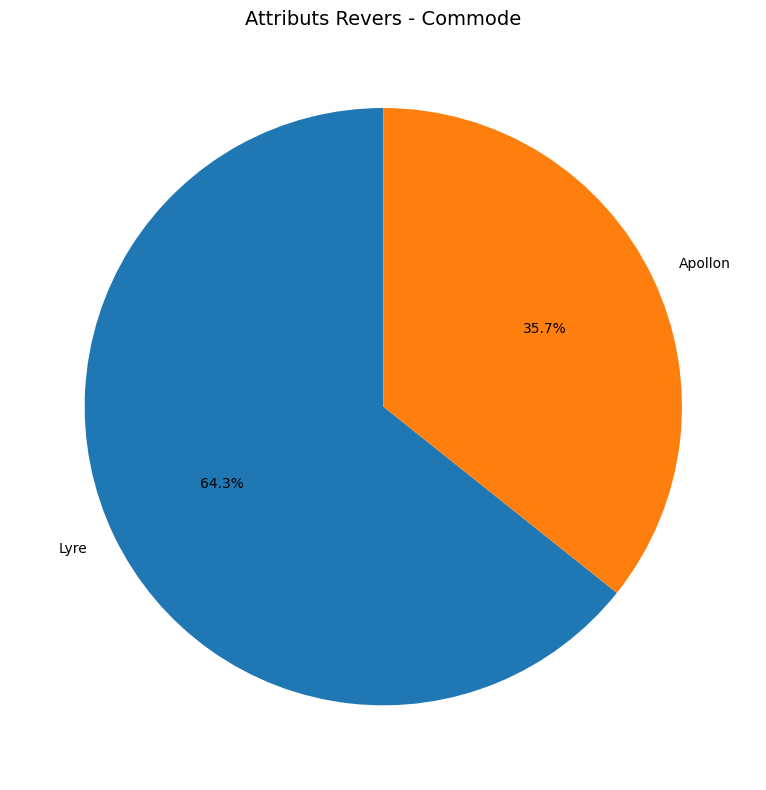

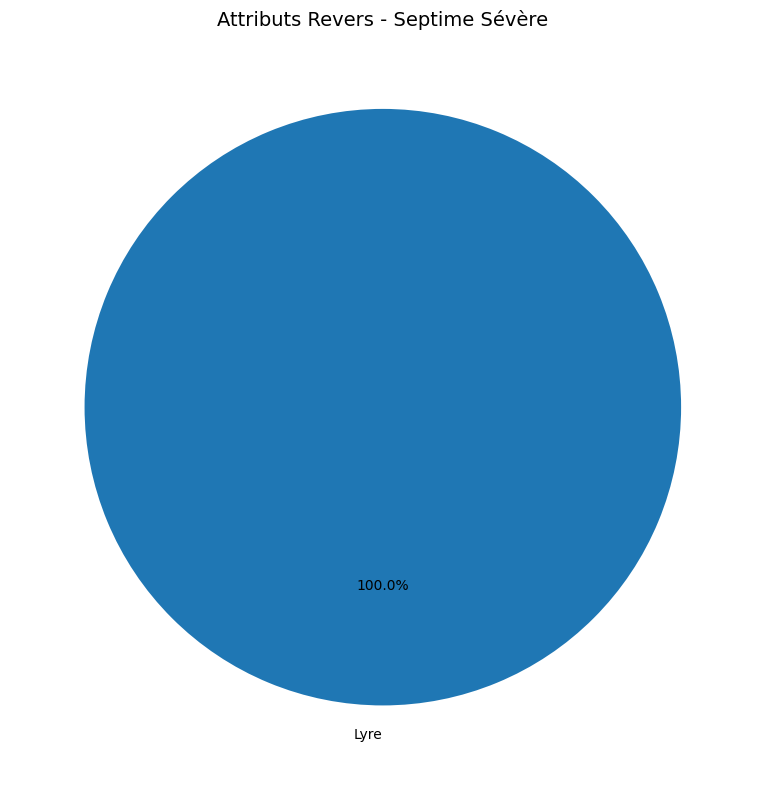

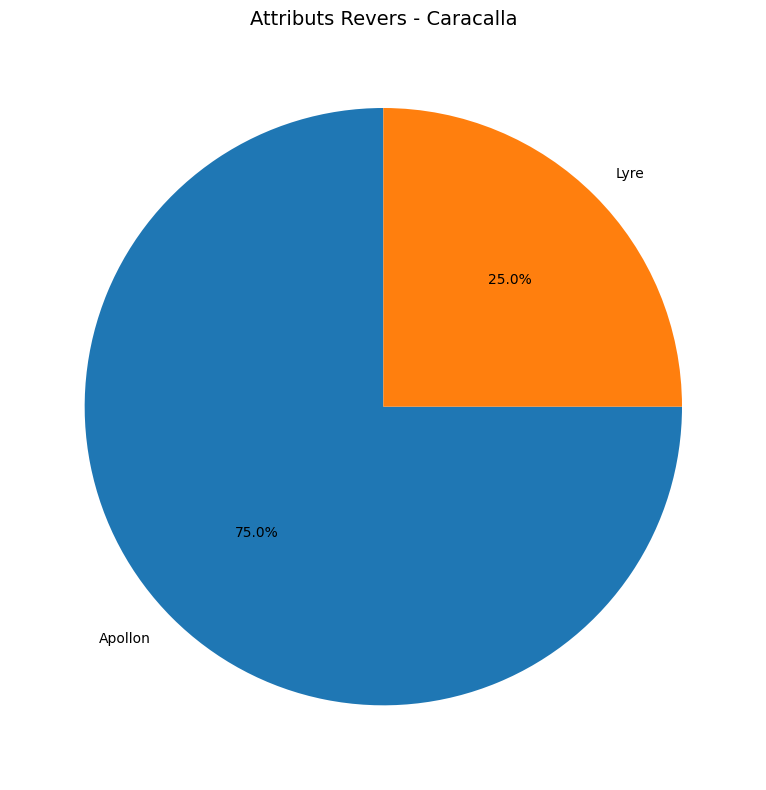

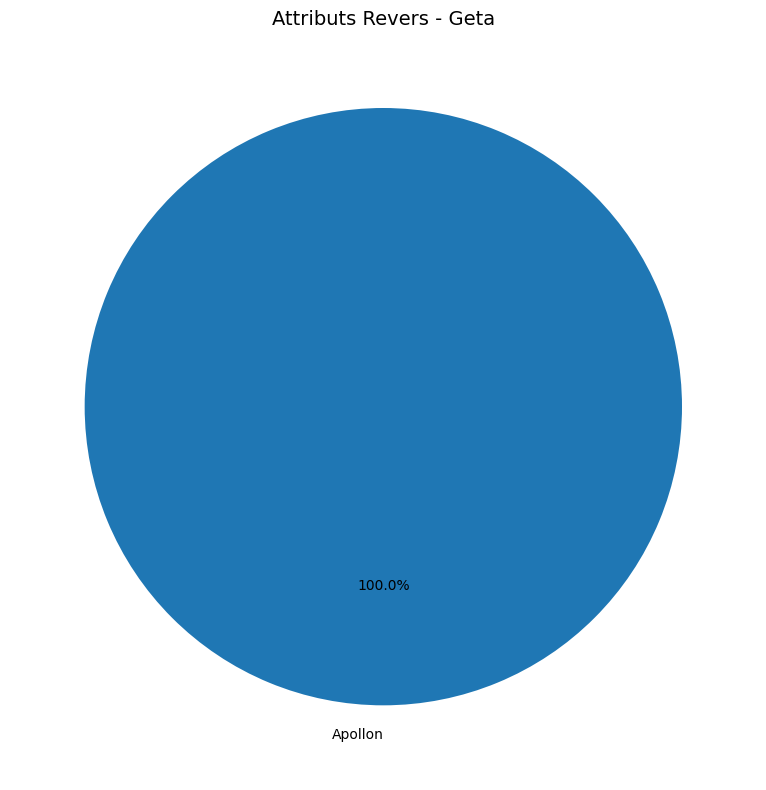

In [64]:
mots_cles = ["corbeau", "lyre", "tripode", "Apollon"]

def categoriser(attribut):
    if pd.isna(attribut):
        return "Autres"
    for mot in mots_cles:
        if mot.lower() in attribut.lower():
            return mot.capitalize()
    return "Autres"

df["Categorie"] = df["Attributs Revers"].apply(categoriser)

empereurs = df["Empereur"].dropna().unique()

for empereur in empereurs:
    df_emp = df[df["Empereur"] == empereur]
    attributs = df_emp["Categorie"].value_counts()

    if attributs.empty:
        continue

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(attributs.values, labels=attributs.index, autopct="%1.1f%%", startangle=90)
    ax.set_title(f"Attributs Revers - {empereur}", fontsize=14)
    plt.tight_layout()
    plt.show()